In [1]:
import pandas as pd
import numpy as np
import re

from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords

In [2]:
train=pd.read_csv('Data/train.csv')

In [3]:
train

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,5378,RT @mention Aha! Found proof of lactation room...,1
7272,2173,We just launched our iPad app at #SXSW! Get al...,1


In [4]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

## Data Cleaning

In [5]:
#Create a function to clean tweets
def cleanText(text):
    text=str(text)  #Coverts Text to String
    text = text.lower()  #Coverts Text To Lower Case
    text=re.sub(r'@[A-Za-z0-9]+','',text)  #Removing @Mentions
    text=re.sub(r'#','',text)  #Removing # Symbols
    text=re.sub(r'RT[\s]+','',text)  #Removing ReTweets
    text=re.sub(r'https?:\/\/\s+','',text)  #Removing the hyperlinks
    text=text.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    text = re.sub(cleanr, '', text)
    text = re.sub('[0-9]+', '', text)  #Removing Numbers
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

In [6]:
#Cleaning the tweets
train['cleanText']=train['tweet'].map(lambda s:cleanText(s))

In [7]:
train

,tweet_id,tweet,sentiment,cleanText
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language touch dif...
1,1851,Learning ab Google doodles! All doodles should...,1,learning google doodle doodle light funny amp ...
2,2689,one of the most in-your-face ex. of stealing t...,2,one face stealing show yr quot sxsw apple scho...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone sxsw app would pretty awesome crash eve...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ip...
...,...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1,google plze tammi middle sxsw craziness everyt...
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,set link edchat musedchat sxsw sxswi newtwitter
7271,5378,RT @mention Aha! Found proof of lactation room...,1,aha found proof lactation room excuse quot mot...
7272,2173,We just launched our iPad app at #SXSW! Get al...,1,launched ipad app sxsw get detail first editio...


## Subjectivity and Polarity

In [14]:
#Create a function to get the Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create 2 new columns
train['Subjectivity']=train['cleanText'].apply(getSubjectivity)
train['Polarity']=train['cleanText'].apply(getPolarity)

In [15]:
train

,tweet_id,tweet,sentiment,cleanText,Subjectivity,Polarity
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language touch dif...,0.650000,0.150000
1,1851,Learning ab Google doodles! All doodles should...,1,learning google doodles doodles light funny am...,0.893750,0.381250
2,2689,one of the most in-your-face ex. of stealing t...,2,one face stealing show yrs quot sxsw apple sch...,0.000000,0.000000
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone sxsw app would pretty awesome crash eve...,1.000000,0.625000
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ip...,0.252273,0.068182
...,...,...,...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1,google plze tammi middle sxsw craziness everyt...,0.150000,0.050000
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,set link edchat musedchat sxsw sxswi newtwitter,0.000000,0.000000
7271,5378,RT @mention Aha! Found proof of lactation room...,1,aha found proof lactation room excuse quot mot...,0.058333,-0.025000
7272,2173,We just launched our iPad app at #SXSW! Get al...,1,launched ipad app sxsw get details first editi...,0.566667,0.325000


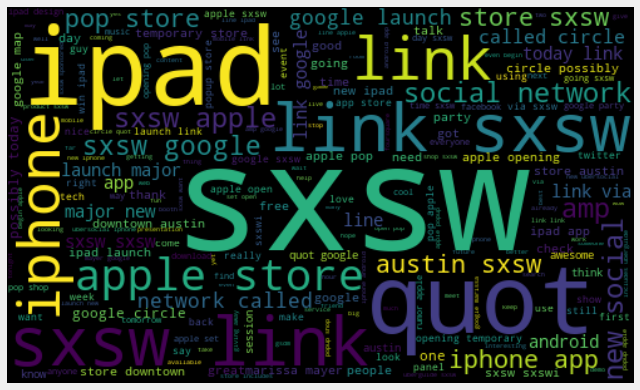

In [8]:
#Plot the WordCloud
plt.figure(figsize=(10,15))
allWords=' '.join([twts for twts in train['cleanText']])
wordCloud= WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 0
    if score==0:
        return 1
    else:
        return 2

train['Analysis']=train['Polarity'].apply(getAnalysis)

In [21]:
train

,tweet_id,tweet,sentiment,cleanText,Subjectivity,Polarity,Analysis
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language touch dif...,0.650000,0.150000,2
1,1851,Learning ab Google doodles! All doodles should...,1,learning google doodles doodles light funny am...,0.893750,0.381250,2
2,2689,one of the most in-your-face ex. of stealing t...,2,one face stealing show yrs quot sxsw apple sch...,0.000000,0.000000,1
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone sxsw app would pretty awesome crash eve...,1.000000,0.625000,2
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ip...,0.252273,0.068182,2
...,...,...,...,...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1,google plze tammi middle sxsw craziness everyt...,0.150000,0.050000,2
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,set link edchat musedchat sxsw sxswi newtwitter,0.000000,0.000000,1
7271,5378,RT @mention Aha! Found proof of lactation room...,1,aha found proof lactation room excuse quot mot...,0.058333,-0.025000,0
7272,2173,We just launched our iPad app at #SXSW! Get al...,1,launched ipad app sxsw get details first editi...,0.566667,0.325000,2


In [22]:
#Print all of the positive tweets
j=1
sortedDF=train.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]==2):
        print(str(j) + ')'+sortedDF['cleanText'][i])
        print()
        j=j+1

1)sxswnui sxsw apple defining language touch different dialects becoming smaller

2)learning google doodles doodles light funny amp innovative exceptions significant occasions googledoodle sxsw

3)iphone sxsw app would pretty awesome crash every mins extended browsing fuckit illmakeitwork

4)line outside apple store austin waiting new ipad sxsw link

5)user new ubersocial iphone app store includes uberguide sxsw sponsored mashable

6)free sxsw sampler itunes link freemusic

7)calyp app get calyp casa sxsw free mobile app available itunes app store amp android market see

8)well yeah music iphone nerds god cute girls everywhere love interactive ends music begins sxsw

9)anyone sxsw want ipad line pick one someone willing pay grab

10)ä___ü ___ _____ google launch major new social network called circles possibly today link sxsw

11)google set launch new social network circles today sxsw

12)google launch major new social network called circles possibly today link sxsw

13)wow something v

954)google launch new social network called circles south southwest today link sxsw circles google

955)xcitng sxsw approaching amp soft launch plans android demo running flyers printed shirts packed austin

956)wait see internet implode austin friday everyone stops normal activity order ipad sxsw

957)google launch major new social network called circles possibly today link sxsw link

958)apple employees ran line high giving everyone sxsw

959)looking forward panel tomorrow sxsw left brain search google right brain search link

960)hey come fast company grille hungry mention zazzlesxsw get customizable iphone case sxsw

961)wahoos sxsw party free beers tacos ritas thurs link

962)never seen many apple products life sxsw

963)improve website rankings google bing advice sxsw link get com content rich deep

964)clever apple set open popup shop core sxsw action link

965)google quot challenge stay true originally built big amp successful brand experimentation amp moving fast sxsw link

96

1517)yes updated iphone app song info stream others also live video streaming sxsw link

1518)learning latest food related apps half people make apps sxsw gsdm check lovefresh coming soon iphone

1519)stoked free sxsw songs itunes link personal favorite barton hollow sundaymorning

1520)wordpress powers websites sxsw talk founder wow russian spam bots nigerian bankers google

1521)google launch new social network sxsw cnet news link sxsw

1522)iphone battery fully recharged courtesy charge anywhere find sxsw amp charge fly

1523)finishing beta android amp iphone sunday couple guys sxsw showing got beta moms ready beta

1524)google maps usage mobile exceeded desktop usage xmas new years day first time marissa mayer sxsw

1525)got shiny new ipad sxsw discover new music link built html flash looks great ipad

1526)apple apple opened pop store austin nerds town sxsw get new ipads link

1527)saw preview new ipad app awesome sxsw

1528)check left brain search google right brain search sxsw l

2302)nieuwe regel quot google tweet quot new quot think speak quot mark belinsky tweets panel sxsw

2303)bars get free drinks iphone doesdroid sxsw

2304)google launch major new social network called circles possibly today updated sxsw link

2305)interesting google launch circles later today context added search sxsw link

2306)apparently google quot preferences quot see google thinks like seenocreepy sxsw pnid

2307)great conversations meet iphone dev meet afternoon onto phoenix happy hour sxsw

2308)google circles first real alternative facebook sxsw

2309)standing top steps right side coming onto patio come say quot android quot teamandroid sxsw

2310)check quot mistakes made building netflix iphone quot going cool always learn mistakes sxsw

2311)hey pick one omg still line new ipad dieing hunger sxsw else line

2312)curious google circle rumored new take next social network stay tuned news sxsw

2313)download free tracks sxsw music sampler available store today link

2314)find aro

3098)google circles new social media site wow sxsw

3099)google circles google latest social venture google circles reportedly launched sxsw today link

3100)google launch major new social network called circles link sxsw

3101)startups talking captive audience apple store line smart idea sxsw

3102)sxsw enchantment quot bright spot apple pagemaker saved apple believe god explanation apple survival

3103)hitlantis ipad cool song explorer app hitlantis com sxsw musicviz

3104)blackout hotel true sxsw form showering light ipad

3105)sxsw thinks larry elevation google great quot lost way caring much biz enough world quot

3106)see google new social network quot circles quot today link sxsw sxswi

3107)google route around traffic saving drivers years time per day finding best route sxsw

3108)hmm sxsw com interactive live stream ipad mobile compatible maybe next year sxsw

3109)expectation engagement ipad visual social delving experience sxsw sxfl

3110)sure care first guy get ipad sxsw un

In [23]:
#Print all of the Negative tweets
j=1
sortedDF=train.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]==0):
        print(str(j) + ')'+sortedDF['cleanText'][i])
        print()
        j=j+1

1)iphone hrs tweeting rise_austin dead need upgrade plugin stations sxsw

2)standing long line surrounded unemployed techies brooklyn sxsw apple store ave waiting ipad

3)find stupid stupid game ipad currently special sxsw sale link

4)bummed miss sxsw year quarantined kiddie cold garageband ipad comfort

5)tessie frontwoman intimate stranger ink painful places get ink respect location link sxsw

6)composed tweet acerbic cynical ipad users phone crashed dumped apps twitterpower sxsw imthatgood

7)minus hours social media mavens start performing degrading sex acts iphone charge sxsw

8)say booths tradeshow waffling ipad portion reps dressed crazy characters sxsw

9)heck sick apple supposedly setting mini store sxsw amp feeling plan

10)spent come sxsw already used ipad wait couple city blocks ipad sxsw link

11)nothing quite like sxsw make want ipad desperately almost drooling guy next

12)thought people spent lot time staring iphone last year sxsw wait

13)cunning apple keeping ipad po

476)chris sacca tweets fake sxsw beta invite follower swarm ensues link ipad

477)cunning apple keeping ipad popup store open late next sxsw parties impulsive lat cont link

478)random apple fan bought lunch everyone line sxsw popup apple store ipad randomactofkindness link

479)dang sxsw rumors false alarm google circles coming probably ever allthingsd link

480)fastball sxsw giving away two new ipad wifi black apple cover tweet info sxswi attsxsw tonight house

481)made time podcast strange iphone corrects quot nostalgic quot sxsw

482)foursquare twitter launched slick new iphone apps week conveniently time tech fest sxsw link

483)life hacker debuts steampunk ipad reclaimed copper piping one mini maglight quot kinda thin quot etch sketch interface sxsw

484)crazy apple opening temporary store austin tomorrow handle rabid sxsw eye pad seekers

485)apparently line get ipad sxsw store grew blocks blocks past mins wut

486)massive sxsw fail run ipad semi full parked front justsayin link

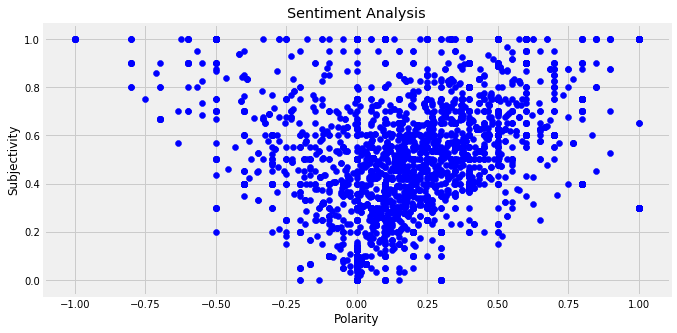

In [24]:
#Plot the Polarity and Subjectivity
plt.figure(figsize=(10,5))
for i in range (0,train.shape[0]):
    plt.scatter(train['Polarity'][i],train['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Insights:
    1) Polarity 0: Neutral Tweets
    2) Polarity 0 >: Positive Tweets
    3) Polarity 0 <: Negative Tweets
    
    there are more number of postive tweets than Negative followed by Neutral Tweets

In [25]:
#Percentage of Postive Tweets
positve_tweets=train[train.Analysis==2]
positve_tweets=positve_tweets['cleanText']
round((positve_tweets.shape[0] / train.shape[0])*100,3)

48.983

In [26]:
#Percentage of Negative Tweets
negative_tweets=train[train.Analysis==0]
negative_tweets=negative_tweets['cleanText']
round((negative_tweets.shape[0] / train.shape[0])*100,3)

8.455

In [27]:
#Percentage of Neutral Tweets
neutral_tweets=train[train.Analysis==1]
neutral_tweets=neutral_tweets['cleanText']
round((neutral_tweets.shape[0] / train.shape[0])*100,3)

42.563

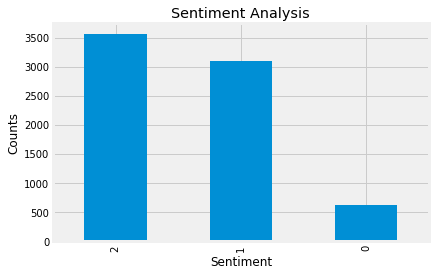

In [28]:
#Plot the Analysis Results
train['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

## Bag-of-Words Features

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(train['cleanText'])

In [15]:
X_train,X_test,y_train,y_test=train_test_split(bow,train['sentiment'],test_size=0.25,random_state=100)

In [16]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='gini')
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
y_pred=randomclassifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [19]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
score=accuracy_score(y_test,y_pred)
print(score)
report=classification_report(y_test,y_pred)
print(report)

[[ 32  63  20   3]
 [ 22 874 188   5]
 [  6 282 290   0]
 [  2  21  10   1]]
0.6580538757559098
              precision    recall  f1-score   support

           0       0.52      0.27      0.36       118
           1       0.70      0.80      0.75      1089
           2       0.57      0.50      0.53       578
           3       0.11      0.03      0.05        34

    accuracy                           0.66      1819
   macro avg       0.48      0.40      0.42      1819
weighted avg       0.64      0.66      0.64      1819



In [37]:
f1_score(y_test, y_pred, average='micro')

0.8834524463991204

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(train['cleanText'])

In [41]:
X_train,X_test,y_train,y_test=train_test_split(tfidf,train['Analysis'],test_size=0.25,random_state=100)

<IPython.core.display.Javascript object>

In [42]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='gini')
randomclassifier.fit(X_train,y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_pred=randomclassifier.predict(X_test)

In [44]:
f1_score(y_test, y_pred, average='micro')

0.8851017042330951

In [46]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)

In [47]:
f1_score(y_test, y_pred, average='micro')

0.8598130841121495